NUMBER THREE
The convergence order of the bisection method, shown below, is linear (=1). Thus, it is quite slow compared to the other methods. It takes more iterations to decrease error of the approximation

0.9100075724887233 -4.263256414560601e-14


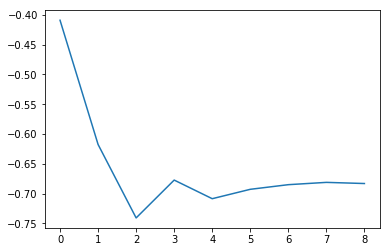

In [6]:
#bisection method
import math
import matplotlib.pyplot as plt
import numpy as np

def expression(t):
    return math.exp(t) - 3*(t**2)
a=0
b=1
n=0

error = []
while b-a > 1.0e-13:
    #the new (better) estimate.
    x = (a+b)/2;
    
    n = n + 1
    error.append(abs(x-math.sqrt(2)))
    #sprintf('n=%d, error=%20.15g \n',n,x-sqrt(2))
    
    #update the boundary.
    if expression(x)*expression(a)<0:
        
        b=x
    else:
        a=x

plt.plot(np.log(np.array(error[1:10])))

print(x, expression(x))

Newton's Method is quite fast--it took less than 3 iterations to get a very accurate approximation. The order is quadratic (=2).

0.910007572488709 0.0


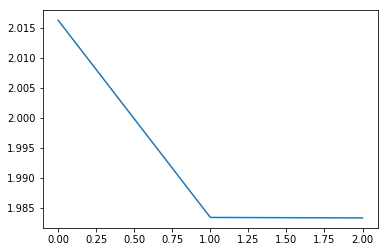

In [7]:
#Newton
x0=1
n=0

newton_error = []
while abs(expression(x0))>1.0e-16:

    x1 = x0 - (expression(x0))/(math.exp(x0) - 6*x0)
    
    n=n+1
    newton_error.append(abs(x1-math.sqrt(2)))
    x0=x1


print(x0, expression(x0))

plt.plot(np.array(newton_error[1:4])/np.array(newton_error[0:3])**2)

The secant method is fast, with order 1.62, but not quite as fast as Newton's method. It took about 7 iterations to get a highly accurate approximation.

0.9100075724887089 4.440892098500626e-16


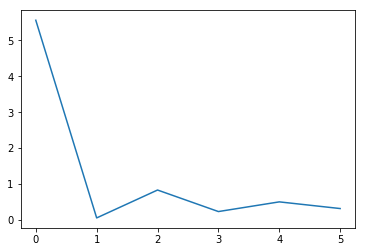

In [3]:
#Secant method

x0=1
x1=0
n=1

secant_error = []
while abs(expression(x1))>1.0e-13:
    #%the new (better) estimate.
    x2=x1-expression(x1)*(x1-x0)/(expression(x1)-expression(x0))
    
    n=n+1;
    secant_error.append(abs(expression(x2)))
    
    #%update the solution.
    x0=x1
    x1=x2

print(x1, expression(x1))
plt.plot(np.array(secant_error[1:7])/np.array(secant_error[0:6])**1.62)


NUMBER FIVE

Once again, we can see the error drops quite fast for Newton's method, even with multiple variables and an output vector. 

In [35]:
import numpy as np
import math
import matplotlib.pylab as plt
from numpy.linalg import inv


#using mathematica, we get alpha_1 = 1.02945, alpha_2 = -0.11781
alpha = np.array([[1.02945],[-0.11781]])

#initial guess
x = 1
y = 0
n = 0

multivariate_error = []
while n<50:
    F = np.matrix([[4*(x**2) + (y**2) -4],[x+y - math.sin(x-y)]])
    J = np.matrix([[8*x, 2*y],[1-math.cos(x-y), 1+math.cos(x-y)]])
    Jinv = inv(J) 
    xn = np.array([[x],[y]])    
    xn_1 = xn - (Jinv*F)
    x = xn_1[0,0]
    y = xn_1[1,0]
    n = n+1
    
    multivariate_error.append(alpha-xn / alpha)
    
    
xn
#plt.plot((q[:,0]))

array([[ 0.99860694],
       [-0.10553049]])

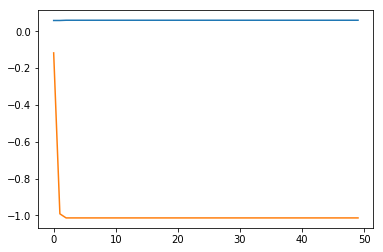

In [37]:
q = np.array(multivariate_error)
plt.plot(q[:,0])
plt.plot(q[:,1])